#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [ ]:
!pip -q install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Data Acquisition

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_set.csv to test_set.csv


In [ ]:
data = pd.read_csv('test_set.csv')
data.head()

,content,polarity
0,kekecewaan untuk ritz standar menginap <number...,negative
1,kekecewaan untuk ritz standar menginap <number...,negative
2,kekurangan <number> tidak ada fasilitas apapun...,negative
3,kelebihan * lokasi strategis * breakfast stand...,negative
4,kelebihan + kamar luas dan ada balkon di setia...,negative


In [ ]:
# Mengubah value pada kolom 'polarity'
data['polarity'] = data['polarity'].replace({'negative': 1, 'positive': 0})
print(data.head())

                                             content  polarity
0  kekecewaan untuk ritz standar menginap <number...         1
1  kekecewaan untuk ritz standar menginap <number...         1
2  kekurangan <number> tidak ada fasilitas apapun...         1
3  kelebihan * lokasi strategis * breakfast stand...         1
4  kelebihan + kamar luas dan ada balkon di setia...         1


/tmp/ipython-input-6-1778603696.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['polarity'] = data['polarity'].replace({'negative': 1, 'positive': 0})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   2429 non-null   object
 1   polarity  2429 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.1+ KB


In [ ]:
print('Total Jumlah review:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Review Positif\t:', data[data.polarity == 0].shape[0], 'data')
print('-- [1] Review Negatif\t:', data[data.polarity == 1].shape[0], 'data')

Total Jumlah review: 2429 data

terdiri dari (label):
-- [0] Review Positif	: 1125 data
-- [1] Review Negatif	: 1304 data


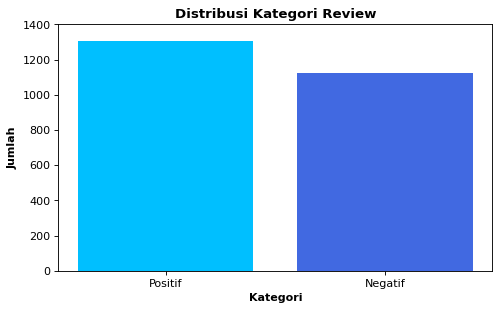

In [ ]:
height = data['polarity'].value_counts()
labels = ('Positif', 'Negatif')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1400)
plt.title('Distribusi Kategori Review', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

#Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['content'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  kelebihan + kamar luas dan ada balkon di setiap kamar yang menghadap kolam renang + ac dingin + channel televisi lengkap kekurangan proses check in sangat lama padahal saya datang pukul <number> siang lebih mereka sangat lama dalam mempersiapkan kamar hotel sirkulasi udara di kamar mandi buruk sehingga jika ada kawan sehabis buang air besar aroma busuknya
Case folding	:  kelebihan  kamar luas dan ada balkon di setiap kamar yang menghadap kolam renang  ac dingin  channel televisi lengkap kekurangan proses check in sangat lama padahal saya datang pukul number siang lebih mereka sangat lama dalam mempersiapkan kamar hotel sirkulasi udara di kamar mandi buruk sehingga jika ada kawan sehabis buang air besar aroma busuknya


#Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2025-06-27 09:58:59--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2025-06-27 09:58:59 (3.23 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

#Stopwords Removal

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

# more_stopword = ['lengket', 'strategis', 'buang', 'kecewa', 'layak', 'handuk', 'sprei', 'breakfast', 'dekil', 'kamar', 'lokasi', 'menginap',
#                  'check in', 'check out', 'bising', 'mengecewakan', 'reservasi', 'bau', 'extrabed', 'sempit', 'nyaman', 'sampah', 'klise',
#                  'lobi', 'lobby', 'diganti', 'balkon', 'kolam', 'renang', 'televisi', 'datang', 'mempersiapkan', 'sirkulasi', 'udara', 'mandi',
#                  'aroma', 'dekat', 'double', 'deluxe', 'twin', 'share', 'bbq', 'harga', 'terjangkau', 'mahal', 'murah', 'fasilitas', 'hambar',
#                  'interior']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['content'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  kelebihan + kamar luas dan ada balkon di setiap kamar yang menghadap kolam renang + ac dingin + channel televisi lengkap kekurangan proses check in sangat lama padahal saya datang pukul <number> siang lebih mereka sangat lama dalam mempersiapkan kamar hotel sirkulasi udara di kamar mandi buruk sehingga jika ada kawan sehabis buang air besar aroma busuknya
Case folding		:  kelebihan  kamar luas dan ada balkon di setiap kamar yang menghadap kolam renang  ac dingin  channel televisi lengkap kekurangan proses check in sangat lama padahal saya datang pukul number siang lebih mereka sangat lama dalam mempersiapkan kamar hotel sirkulasi udara di kamar mandi buruk sehingga jika ada kawan sehabis buang air besar aroma busuknya
Stopword removal	:  kelebihan kamar luas balkon kamar menghadap kolam renang ac dingin channel televisi lengkap kekurangan proses check in number siang kamar hotel sirkulasi udara kamar mandi buruk kawan sehabis buang air aroma busuknya


#Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['content'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  kelebihan + kamar luas dan ada balkon di setiap kamar yang menghadap kolam renang + ac dingin + channel televisi lengkap kekurangan proses check in sangat lama padahal saya datang pukul <number> siang lebih mereka sangat lama dalam mempersiapkan kamar hotel sirkulasi udara di kamar mandi buruk sehingga jika ada kawan sehabis buang air besar aroma busuknya
Case folding		:  kelebihan  kamar luas dan ada balkon di setiap kamar yang menghadap kolam renang  ac dingin  channel televisi lengkap kekurangan proses check in sangat lama padahal saya datang pukul number siang lebih mereka sangat lama dalam mempersiapkan kamar hotel sirkulasi udara di kamar mandi buruk sehingga jika ada kawan sehabis buang air besar aroma busuknya
Stopword removal	:  kelebihan kamar luas balkon kamar menghadap kolam renang ac dingin channel televisi lengkap kekurangan proses check in number siang kamar hotel sirkulasi udara kamar mandi buruk kawan sehabis buang air aroma busuknya
Stemming		:  lebih kam

#Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

In [ ]:
%%time
data['clean_content'] = data['content'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 7min 44s, sys: 2.12 s, total: 7min 47s
Wall time: 7min 49s


In [ ]:
data

,content,polarity,clean_content
0,kekecewaan untuk ritz standar menginap <number...,1,kecewa ritz standar inap nomor malam kecewa ce...
1,kekecewaan untuk ritz standar menginap <number...,1,kecewa ritz standar inap nomor malam kecewa ce...
2,kekurangan <number> tidak ada fasilitas apapun...,1,kurang nomor fasilitas apa lobi sempit nomor k...
3,kelebihan * lokasi strategis * breakfast stand...,1,lebih lokasi strategis breakfast standar kuran...
4,kelebihan + kamar luas dan ada balkon di setia...,1,lebih kamar luas balkon kamar hadap kolam rena...
...,...,...,...
2424,besar baru dibuat pizza italia dan sangat mura...,0,pizza italia murah milik nomor pizza nomor wat...
2425,besar bbq segar menu untuk makan malam dan ben...,0,bbq segar menu makan malam lezat salad minum k...
2426,besar bersih dan nyaman baik dan membantu staf...,0,bersih nyaman bantu staf klub pantai kolam ren...
2427,besar bersih dan nyaman baik dan membantu staf...,0,bersih nyaman bantu staf klub pantai kolam ren...


In [ ]:
# Simpan Data yang telah melalui teks preprocessing
data.to_csv('clean_data.csv')

#Feature Engineering

##Feature Extraction

In [ ]:
# Pisahkan kolom feature dan target
x = data['clean_content']
y = data['polarity']

In [ ]:
x

,clean_content
0,kecewa ritz standar inap nomor malam kecewa ce...
1,kecewa ritz standar inap nomor malam kecewa ce...
2,kurang nomor fasilitas apa lobi sempit nomor k...
3,lebih lokasi strategis breakfast standar kuran...
4,lebih kamar luas balkon kamar hadap kolam rena...
...,...
2424,pizza italia murah milik nomor pizza nomor wat...
2425,bbq segar menu makan malam lezat salad minum k...
2426,bersih nyaman bantu staf klub pantai kolam ren...
2427,bersih nyaman bantu staf klub pantai kolam ren...


In [ ]:
y

,polarity
0,1
1,1
2,1
3,1
4,1
...,...
2424,0
2425,0
2426,0
2427,0


In [ ]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
bow = CountVectorizer(ngram_range=(1,1))
bow.fit(x)

CountVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(bow.get_feature_names_out()))

5349


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(bow.get_feature_names_out())

['abad' 'abadi' 'abai' ... 'zupa' 'zuri' 'zzz']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

x_bow = bow.transform(x).toarray()
x_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(x_bow, output)

##Feature Extraction (TF-IDF dan N-Gram)

In [ ]:
'''
Convert a collection of raw documents to a matrix of TF-IDF features
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
'''
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(x)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

5349


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['abad' 'abadi' 'abai' ... 'zupa' 'zuri' 'zzz']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

x_tf_idf = tf_idf.transform(x).toarray()
x_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(x_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abad,abadi,abai,abal,abang,aber,abiz,abizz,about,abu,...,yummo,yummy,yunani,yup,zaitun,zaman,zoo,zupa,zuri,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(x_tf_idf, output)

##Feature Selection

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
x = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=1000)
x_kbest_features = chi2_features.fit_transform(x, y)

# Reduced features
print('Original feature number:', x.shape[1])
print('Reduced feature number:', x_kbest_features.shape[1])

Original feature number: 5349
Reduced feature number: 1000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.211282
1,0.276501
2,2.605222
3,0.401542
4,0.094592
...,...
5344,0.301601
5345,0.444315
5346,0.514676
5347,1.116264


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.211282,abad
1,0.276501,abadi
2,2.605222,abai
3,0.401542,abal
4,0.094592,abang
...,...,...
5344,0.301601,zaman
5345,0.444315,zoo
5346,0.514676,zupa
5347,1.116264,zuri


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
722,3.329299e+01,buruk
538,2.382965e+01,bersih
3271,2.056286e+01,nyaman
2441,1.816893e+01,kotor
2439,1.424023e+01,kota
...,...,...
4381,1.538436e-05,sila
381,7.939153e-07,bangun
398,7.271517e-07,barbekyu
1654,4.735921e-07,hahaha


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False,  True, ..., False,  True, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abai',
 'abu',
 'ac',
 'acces',
 'acnya',
 'acuh',
 'adil',
 'agam',
 'agenda',
 'air',
 'airport',
 'akan',
 'akses',
 'ala',
 'alana',
 'alas',
 'alhamdulillaah',
 'alih',
 'all',
 'amar',
 'ambasador',
 'ambil',
 'amis',
 'anak',
 'ancol',
 'aneh',
 'aneka',
 'anggap',
 'anggota',
 'anggur',
 'angkring',
 'apak',
 'apek',
 'apik',
 'aplikasi',
 'appropriay',
 'ares',
 'asi',
 'asik',
 'asin',
 'asri',
 'aston',
 'asyik',
 'atanaya',
 'atlet',
 'atrium',
 'atur',
 'aud',
 'australia',
 'awat',
 'ayer',
 'babarsari',
 'baca',
 'bad',
 'bahan',
 'bahas',
 'bahasa',
 'bakmi',
 'bakso',
 'balas',
 'balikpapan',
 'balung',
 'bambu',
 'bandeng',
 'bandung',
 'banged',
 'banget',
 'bantal',
 'bantu',
 'barat',
 'barbeque',
 'basah',
 'basket',
 'baso',
 'bathtub',
 'batuk',
 'bau',
 'bawang',
 'bayar',
 'bayi',
 'bebas',
 'becak',
 'beku',
 'belah',
 'belanja',
 'benar',
 'benci',
 'bener',
 'benesari',
 'bensin',
 'bentuk',
 'berry',
 'bersih',
 'beruang',
 'besrama',
 'best',
 'betah',


In [ ]:
tf_idf.vocabulary_

{'kecewa': 2185,
 'ritz': 3983,
 'standar': 4542,
 'inap': 1860,
 'nomor': 3243,
 'malam': 2825,
 'cek': 795,
 'in': 1859,
 'reservasi': 3936,
 'poin': 3642,
 'meja': 2957,
 'resepsionis': 3933,
 'terima': 4842,
 'email': 1287,
 'kamar': 2105,
 'jendela': 2010,
 'kertas': 2284,
 'tipis': 4924,
 'lintas': 2687,
 'jakarta': 1953,
 'jalan': 1954,
 'bising': 598,
 'sungguh': 4620,
 'tahan': 4680,
 'kurang': 2497,
 'fasilitas': 1372,
 'apa': 193,
 'lobi': 2708,
 'sempit': 4253,
 'enak': 1298,
 'bau': 436,
 'nya': 3269,
 'sampah': 4093,
 'pojok': 3645,
 'tersisah': 4859,
 'sandal': 4104,
 'pasang': 3474,
 'tambah': 4697,
 'extrabed': 1356,
 'suasana': 4585,
 'ruang': 4032,
 'breakfast': 663,
 'nyaman': 3271,
 'wifi': 5282,
 'bar': 394,
 'alas': 101,
 'klise': 2353,
 'lebih': 2608,
 'lokasi': 2723,
 'strategis': 4568,
 'handuk': 1681,
 'sprei': 4523,
 'layak': 2595,
 'buang': 682,
 'ganti': 1480,
 'barang': 396,
 'maaf': 2778,
 'yah': 5321,
 'kain': 2085,
 'pel': 3513,
 'pakai': 3406,
 'warna

In [ ]:
# Lihat vocab yang dihasilkan oleh TF_IDF
# tf_idf.vocabulary_

kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'kecewa': 2185,
 'standar': 4542,
 'inap': 1860,
 'nomor': 3243,
 'malam': 2825,
 'cek': 795,
 'in': 1859,
 'meja': 2957,
 'resepsionis': 3933,
 'terima': 4842,
 'email': 1287,
 'kamar': 2105,
 'kertas': 2284,
 'jakarta': 1953,
 'jalan': 1954,
 'fasilitas': 1372,
 'lobi': 2708,
 'enak': 1298,
 'bau': 436,
 'sampah': 4093,
 'tambah': 4697,
 'suasana': 4585,
 'ruang': 4032,
 'breakfast': 663,
 'nyaman': 3271,
 'wifi': 5282,
 'alas': 101,
 'lebih': 2608,
 'lokasi': 2723,
 'handuk': 1681,
 'sprei': 4523,
 'buang': 682,
 'ganti': 1480,
 'maaf': 2778,
 'yah': 5321,
 'pel': 3513,
 'pakai': 3406,
 'warna': 5244,
 'pinggir': 3611,
 'luas': 2751,
 'hadap': 1650,
 'kolam': 2368,
 'renang': 3913,
 'ac': 12,
 'dingin': 1161,
 'channel': 831,
 'televisi': 4774,
 'lengkap': 2646,
 'hotel': 1790,
 'mandi': 2854,
 'buruk': 722,
 'habis': 1648,
 'air': 67,
 'busuk': 730,
 'pusat': 3775,
 'bandung': 372,
 'trans': 4991,
 'travel': 5003,
 'pilih': 3603,
 'kecuali': 2190,
 'paksa': 3411,
 'twin': 5075,
 '

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,abai,abu,ac,acces,acnya,acuh,adil,agam,agenda,air,...,xxi,yaa,yah,yanga,yangbagus,yogya,yogyakarta,yum,yummy,zuri
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.234753,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.154618,0.0,0.0,0.0,0.0,0.0,0.0,0.145683,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2425,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.202223,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2426,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2427,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

#Modelling (Machine Learning)

In [ ]:
from sklearn.naive_bayes import MultinomialNB           # Pilih salah satu algoritma pembelajaran
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih

In [ ]:
# Proses memisahkan data uji dan data latih. Perbandingan 80:20
# Random_state digunakan untuk internal random generator

x_train, x_test, y_train, y_test = train_test_split(x_kbest_features, y, test_size=0.2, random_state=40)

In [ ]:
from joblib import dump

# Training the model
algorithm = MultinomialNB()               # Load algoritma pembelajaran tertentu
model = algorithm.fit(x_train, y_train)   # Fitkan (latih) algoritman menggunakan data latih & label latih

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk prediksi pada data uji
model_pred = model.predict(x_test)

# Tampilkan hasil prediksi model
model_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [ ]:
# Label sebenarnya (actual label)
y_test

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,

#Model Evaluation

In [ ]:
# Hitung berapa jumlah data yang berhasil di prediksi model & jumlah data yang salah
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)
# Hitung berapa jumlah data yang berhasil di prediksi model & jumlah data yang salah
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Accuracy pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 436
Jumlah prediksi salah	: 50
Jumlah prediksi benar	: 436
Jumlah prediksi salah	: 50
Accuracy pengujian	: 89.7119341563786 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[184  32]
 [ 18 252]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       216
           1       0.89      0.93      0.91       270

    accuracy                           0.90       486
   macro avg       0.90      0.89      0.90       486
weighted avg       0.90      0.90      0.90       486



In [ ]:
# Cross Validation

from sklearn.model_selection import ShuffleSplit    # bisa pilih beberapa teknik cross validation
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy = (cross_val_score(model, x_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Accuracy setiap split:', cv_accuracy, '\n')
print('Rata-rata Accuracy cross validation:', avg_accuracy)

Accuracy setiap split: [0.89711934 0.8909465  0.91152263 0.90740741 0.86419753 0.89506173
 0.87654321 0.89506173 0.88477366 0.89506173] 

Rata-rata Accuracy cross validation: 0.8917695473251028


#Deployment

In [ ]:
from joblib import load

# load model
model = load('model_1.joblib')

# load vocabulary dari TF_idf
vocab = pickle.load(open('kbest_feature.pickle', 'rb'))

In [ ]:
#@title Masukkan Teks Anda:
input_text = "makanannya ngga fresh, kamarnya cukup luas, tapi agak pengap" #@param {type:"string"}

pre_input_text = text_preprocessing_process(input_text)   # lakukan text pre processing pada text input

tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))       # definisikan TF_IDF

result = model.predict(tf_idf_vec.fit_transform([pre_input_text]))  # Lakukan prediksi

print('Hasil Text Preprocessing :', pre_input_text)

if (result==0):
  sms = 'Positif'
elif (result==1):
  sms = 'Negatif'
else:
  sms = '???'

print('Hasil prediksi', input_text, ' adalah', sms)

Hasil Text Preprocessing : makan fresh kamar luas pengap
Hasil prediksi makanannya ngga fresh, kamarnya cukup luas, tapi agak pengap  adalah Negatif
